<a href="https://colab.research.google.com/github/tinybeachthor/ucboulder-ml-supervised/blob/main/model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [ ]:
!wget https://raw.githubusercontent.com/tinybeachthor/ucboulder-ml-supervised/main/data/billboard_2010s.csv

--2024-04-25 22:29:51--  https://raw.githubusercontent.com/tinybeachthor/ucboulder-ml-supervised/main/data/billboard_2010s.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 825815 (806K) [text/plain]
Saving to: ‘billboard_2010s.csv’

billboard_2010s.csv 100%[===================>] 806.46K  --.-KB/s    in 0.05s   

2024-04-25 22:29:52 (17.1 MB/s) - ‘billboard_2010s.csv’ saved [825815/825815]



In [ ]:
df = pd.read_csv('billboard_2010s.csv')
df = df.dropna()
print(df.shape)
print(df.columns)

features_numeric = list(df.select_dtypes(include=['int', 'float']).columns)
print(features_numeric)

df.head()

(4425, 22)
Index(['song_id', 'song', 'performer', 'first_week_on_chart',
       'last_week_on_chart', 'weeks_on_chart', 'highest_position',
       'lowest_position', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
['weeks_on_chart', 'highest_position', 'lowest_position', 'spotify_track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


,song_id,song,performer,first_week_on_chart,last_week_on_chart,weeks_on_chart,highest_position,lowest_position,spotify_track_duration_ms,spotify_track_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,#BeautifulMariah Carey Featuring Miguel,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,2013-09-07,16,15,95,199866.0,False,...,4.0,-5.405,1.0,0.0391,0.34600,0.000000,0.3470,0.469,107.042,4.0
1,#SELFIEThe Chainsmokers,#SELFIE,The Chainsmokers,2014-03-15,2014-05-24,11,16,95,183750.0,False,...,0.0,-3.282,1.0,0.2260,0.01340,0.000012,0.0787,0.651,127.973,4.0
2,#thatPOWERwill.i.am Featuring Justin Bieber,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,2013-07-20,16,17,85,279506.0,False,...,6.0,-6.096,0.0,0.0583,0.00112,0.000077,0.0748,0.403,128.000,4.0
3,$ave Dat MoneyLil Dicky Featuring Fetty Wap & ...,$ave Dat Money,Lil Dicky Featuring Fetty Wap & Rich Homie Quan,2015-10-10,2016-03-19,19,71,100,290835.0,True,...,2.0,-5.361,1.0,0.2300,0.11400,0.000000,0.2240,0.364,98.012,4.0
4,'Til Summer Comes AroundKeith Urban,'Til Summer Comes Around,Keith Urban,2010-01-30,2010-05-15,16,58,94,331466.0,False,...,9.0,-7.608,0.0,0.0331,0.59300,0.000136,0.7700,0.308,127.907,4.0


## Explore

<Axes: >

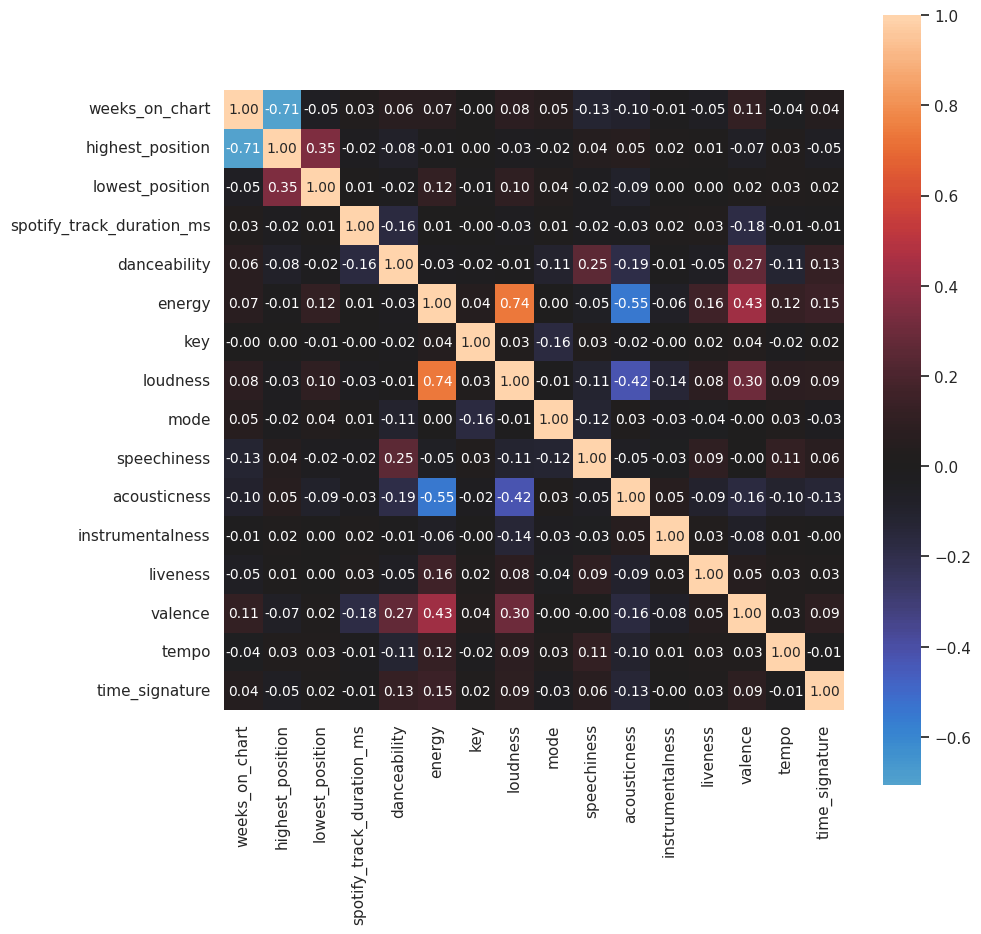

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df[features_numeric].corr(),
            annot=True, square=True, center=0.0, fmt=".2f", annot_kws={"size": 10})

## Split data

In [ ]:
target = 'weeks_on_chart'
X = df.drop(columns=[target])
y = df[target]

train, test, X_train, X_test, y_train, y_test = train_test_split(df, X, y, test_size=0.25)

print(X_train.shape, y_train.shape)

nonfeatures = ['song_id', 'song', 'performer', target]
features = list(filter(lambda x: x not in nonfeatures, features_numeric))

print(features)

(3318, 21) (3318,)
['highest_position', 'lowest_position', 'spotify_track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Pre-Learning

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train[features], y_train)

for (feature, importance) in zip(tree.feature_names_in_, tree.feature_importances_):
  print(f'{importance:.03f} {feature}')

0.577 highest_position
0.106 lowest_position
0.023 spotify_track_duration_ms
0.035 danceability
0.037 energy
0.020 key
0.024 loudness
0.005 mode
0.037 speechiness
0.031 acousticness
0.022 instrumentalness
0.030 liveness
0.032 valence
0.019 tempo
0.003 time_signature


In [ ]:
tree.score(X_test[features], y_test)

0.2828227984091135

## Learning

In [ ]:
clf_features = tree.feature_names_in_[:2]
print(clf_features)

clf = SVR(kernel='rbf', C=10, epsilon=0.1)
clf.fit(X_train[clf_features], y_train)

clf.score(X_test[clf_features], y_test)

['highest_position' 'lowest_position']


0.6386297745329182

In [ ]:
parameters = {
    'C': np.logspace(-3, 3, base=2, num=7),
    'epsilon': np.logspace(-3, 3, base=2, num=7),
}
clf = GridSearchCV(SVR(kernel='rbf'),
                   parameters, cv=5)

grid = clf.fit(X_train[clf_features], y_train)

In [ ]:
print(grid.best_score_, grid.best_params_)

0.6209194654382431 {'C': 8.0, 'epsilon': 4.0}


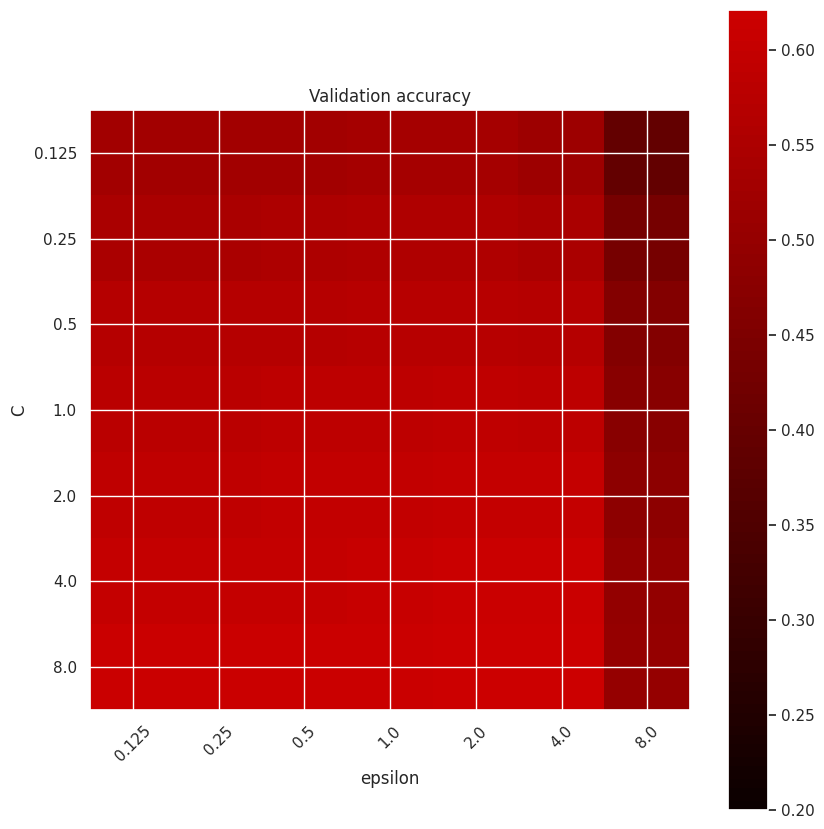

In [ ]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotSearchGrid(grid):
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["epsilon"]))

    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('epsilon')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["epsilon"])), grid.param_grid["epsilon"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

plotSearchGrid(grid)

## Learning 2

In [ ]:
excluded = ['highest_position', 'lowest_position']
clf_features = list(filter(lambda x: x not in excluded, features))
print(clf_features)

clf = RandomForestRegressor(n_estimators=1000, max_depth=1, max_features="sqrt")
clf.fit(X_train[clf_features], y_train)

clf.score(X_test[clf_features], y_test)

['spotify_track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


0.022271146715872492

In [ ]:
for (feature, importance) in zip(clf.feature_names_in_, clf.feature_importances_):
  print(f'{importance:.03f} {feature}')

0.161 spotify_track_duration_ms
0.148 danceability
0.038 energy
0.000 key
0.036 loudness
0.017 mode
0.213 speechiness
0.146 acousticness
0.006 instrumentalness
0.064 liveness
0.132 valence
0.014 tempo
0.025 time_signature


In [ ]:
model = smf.ols(data=train, formula=f'{target} ~ danceability + valence + speechiness + acousticness').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     33.05
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.57e-27
Time:                        23:00:04   Log-Likelihood:                -12841.
No. Observations:                3318   AIC:                         2.569e+04
Df Residuals:                    3313   BIC:                         2.572e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.4215      0.991      8.500   

In [ ]:
model = smf.ols(data=train, formula=f'{target} ~ danceability * energy + speechiness').fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     27.98
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.95e-23
Time:                        23:02:25   Log-Likelihood:                -12851.
No. Observations:                3318   AIC:                         2.571e+04
Df Residuals:                    3313   BIC:                         2.574e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.2099    